In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score
import time
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble, preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from my_functions import *
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC as LSVC
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv('Data/covtype.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
df[54].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

In [4]:
df = df[df[54] <= 2]
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576882,2617,29,13,390,128,2081,215,211,130,592,...,0,0,0,0,0,0,0,0,0,2
576883,2614,21,13,379,125,2051,211,212,135,618,...,0,0,0,0,0,0,0,0,0,2
576884,2612,17,13,371,123,2021,208,211,138,644,...,0,0,0,0,0,0,0,0,0,2
576885,2610,16,14,365,110,1991,208,211,138,671,...,0,0,0,0,0,0,0,0,0,2


In [5]:
df = df.reset_index().drop('index', axis = 1)
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
1,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
2,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
3,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
4,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495136,2617,29,13,390,128,2081,215,211,130,592,...,0,0,0,0,0,0,0,0,0,2
495137,2614,21,13,379,125,2051,211,212,135,618,...,0,0,0,0,0,0,0,0,0,2
495138,2612,17,13,371,123,2021,208,211,138,644,...,0,0,0,0,0,0,0,0,0,2
495139,2610,16,14,365,110,1991,208,211,138,671,...,0,0,0,0,0,0,0,0,0,2


In [6]:
df[54].value_counts()

2    283301
1    211840
Name: 54, dtype: int64

In [7]:
X = df.drop(54, axis = 1)
Y = pd.factorize(df[54])[0]

In [8]:
X_train,Y_train = shuffle(X, Y)
X_train = preprocessing.scale(X_train)
X_train = X_train[0:50000]
Y_train = Y_train[0:50000]

In [11]:
Y_train.shape

(50000,)

In [12]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([28844, 21156], dtype=int64))

In [9]:
def RFfunc(x_train1, x_test1, y_train1, y_test1):
    clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, 
                                          random_state=42)
    clf.fit(x_train1, y_train1)
    
    probs_train = clf.predict_proba(x_train1)[:,1]
    t_f1, t_apr, t_acc, t_auc = matrix_info(0.7521, y_train1, probs_train)    
    
    probs = clf.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.6651,y_test1, probs)
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3), round(t_f1,3), round(t_apr,3), round(t_acc,3), round(t_auc,3)

In [10]:
def MLPfunc(x_train1, x_test1, y_train1, y_test1):
    start = time.time()
    mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.001, 
                        hidden_layer_sizes = (32, 32), max_iter = 10000)
    mlp.fit(x_train1, y_train1)
    
    probs_train = mlp.predict_proba(x_train1)[:,1]
    t_f1, t_apr, t_acc, t_auc = matrix_info(0.7521, y_train1, probs_train)
    
    probs = mlp.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.77, y_test1, probs)
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3), round(t_f1,3), round(t_apr,3), round(t_acc,3), round(t_auc,3)

In [11]:
def SVMfunc(x_train1, x_test1, y_train1, y_test1):
    start = time.time()
    svc = SVC(kernel = 'rbf', C = 5, degree = 10, gamma = 0.04, 
              max_iter =  100000, probability = True, n_jobs = -1)
    svc.fit(x_train1, y_train1)
    
    probs_train = svc.predict_proba(x_train1)[:,1]
    t_f1, t_apr, t_acc, t_auc = matrix_info(0.7521, y_train1, probs_train)
    
    probs = svc.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.7521,y_test1, probs)
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3), round(t_f1,3), round(t_apr,3), round(t_acc,3), round(t_auc,3)

In [12]:
def LSVMfunc(x_train1, x_test1, y_train1, y_test1):
    start=time.time()
    svc = LSVC(C = 3, loss = 'hinge', max_iter=10000)
    svc = CalibratedClassifierCV(svc)
    svc.fit(x_train1,y_train1)
    
    probs_train = svc.predict_proba(x_train1)[:,1]
    t_f1, t_apr, t_acc, t_auc = matrix_info(0.7521, y_train1, probs_train)
    
    probs = svc.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.7521,y_test1, probs)
    

    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3), round(t_f1,3), round(t_apr,3), round(t_acc,3), round(t_auc,3)

In [14]:
rf = np.empty([9, 7])
mlp = np.empty([9, 7])
svm = np.empty([9, 7])

rf_train = np.empty([9, 7])
mlp_train = np.empty([9, 7])
svm_train = np.empty([9, 7])


test_sizes = [0.2,0.5,0.8]
j = 0
start1 = time.time()
for size in test_sizes:
    for i in np.arange(3):
        print(size, i)
        x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=size)
        rf_time = time.time()
        rf_f1, rf_apr, rf_acc, rf_auc, t_rf_f1, t_rf_apr, t_rf_acc, t_rf_auc = RFfunc(x_train1, x_test1, y_train1, y_test1)
        rf_time = time.time() - rf_time
        
        mlp_time = time.time()
        mlp_f1, mlp_apr, mlp_acc, mlp_auc, t_mlp_f1, t_mlp_apr, t_mlp_acc, t_mlp_auc = MLPfunc(x_train1, x_test1, y_train1, y_test1)
        mlp_time = time.time() - mlp_time
        
        svm_time = time.time()
        svm_f1, svm_apr, svm_acc, svm_auc, t_svm_f1, t_svm_apr, t_svm_acc, t_svm_auc = LSVMfunc(x_train1, x_test1, y_train1, y_test1)
        svm_time = time.time() - svm_time
        
        
        rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc, i, size, rf_time]
        mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc, i, size, mlp_time]
        svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc, i, size, svm_time]
        
        rf_train[j] = [t_rf_f1, t_rf_apr, t_rf_acc, t_rf_auc, i, size, rf_time]
        mlp_train[j] = [t_mlp_f1, t_mlp_apr, t_mlp_acc, t_mlp_auc, i, size, mlp_time]
        svm_train[j] = [t_svm_f1, t_svm_apr, t_svm_acc, t_svm_auc, i, size, svm_time]
        
        
        j = j + 1
now1 = time.time()
print('Elapsed Time: ' + str(int(now1-start1)) + ' seconds')

0.2 0
f1_score:
1.0
precision_score:
1.0
accuracy_score:
1.0
Confusion Matrix:
[[23044     0]
 [    0 16956]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23044
           1       1.00      1.00      1.00     16956

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

f1_score:
0.9007915565555222
precision_score:
0.9006943145845983
accuracy_score:
0.903
Confusion Matrix:
[[5261  489]
 [ 481 3769]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5750
           1       0.89      0.89      0.89      4250

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8965681967895334
precision_score:
0.8972350115050589
accuracy_score:
0.899125
Confusion Matr

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7745064123958214
precision_score:
0.7731906785487533
accuracy_score:
0.777975
Confusion Matrix:
[[18040  5004]
 [ 3877 13079]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     23044
           1       0.72      0.77      0.75     16956

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7680026646376427
precision_score:
0.767123918738698
accuracy_score:
0.7723
Confusion Matrix:
[[4542 1208]
 [1069 3181]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5750
           1       0.72      0.75      0.74      4250

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

Elapsed Time: 67 seconds
0.2 1
f1_score:
1.0
precision_score:
1.0
accuracy_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7708429551709264
precision_score:
0.769604433816248
accuracy_score:
0.773825
Confusion Matrix:
[[17758  5264]
 [ 3783 13195]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     23022
           1       0.71      0.78      0.74     16978

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000

f1_score:
0.7778434576663362
precision_score:
0.7764659436987382
accuracy_score:
0.781
Confusion Matrix:
[[4501 1271]
 [ 919 3309]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      5772
           1       0.72      0.78      0.75      4228

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Elapsed Time: 69 seconds
0.2 2
f1_score:
1.0
precision_score:
1.0
accuracy_s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7741496681631856
precision_score:
0.772929837628888
accuracy_score:
0.77785
Confusion Matrix:
[[18117  4904]
 [ 3982 12997]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     23021
           1       0.73      0.77      0.75     16979

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7728563316297559
precision_score:
0.7715099430680532
accuracy_score:
0.7761
Confusion Matrix:
[[4478 1295]
 [ 944 3283]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      5773
           1       0.72      0.78      0.75      4227

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.78      0.78      0.78     10000

Elapsed Time: 62 seconds
0.5 0
f1_score:
1.0
precision_score:
1.0
accuracy_s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7740025857493337
precision_score:
0.772928522416163
accuracy_score:
0.77808
Confusion Matrix:
[[11405  2995]
 [ 2553  8047]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     14400
           1       0.73      0.76      0.74     10600

    accuracy                           0.78     25000
   macro avg       0.77      0.78      0.77     25000
weighted avg       0.78      0.78      0.78     25000

f1_score:
0.7704779377190436
precision_score:
0.7692143427309853
accuracy_score:
0.77356
Confusion Matrix:
[[11118  3276]
 [ 2385  8221]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     14394
           1       0.72      0.78      0.74     10606

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.78      0.77      0.77     25000

Elapsed Time: 18 seconds
0.5 1
f1_score:
1.0
precision_score:
1.0
accur

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7726404291160907
precision_score:
0.7713669799436552
accuracy_score:
0.77604
Confusion Matrix:
[[11229  3150]
 [ 2449  8172]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     14379
           1       0.72      0.77      0.74     10621

    accuracy                           0.78     25000
   macro avg       0.77      0.78      0.77     25000
weighted avg       0.78      0.78      0.78     25000

f1_score:
0.770764139414511
precision_score:
0.7701357054090324
accuracy_score:
0.773
Confusion Matrix:
[[10897  3518]
 [ 2157  8428]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     14415
           1       0.71      0.80      0.75     10585

    accuracy                           0.77     25000
   macro avg       0.77      0.78      0.77     25000
weighted avg       0.78      0.77      0.77     25000

Elapsed Time: 29 seconds
0.5 2
f1_score:
1.0
precision_score:
1.0
accurac

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7777820714510164
precision_score:
0.7764140976259479
accuracy_score:
0.78148
Confusion Matrix:
[[11381  3063]
 [ 2400  8156]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     14444
           1       0.73      0.77      0.75     10556

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000

f1_score:
0.7689466858561287
precision_score:
0.7677411214476169
accuracy_score:
0.77196
Confusion Matrix:
[[11077  3273]
 [ 2428  8222]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     14350
           1       0.72      0.77      0.74     10650

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.78      0.77      0.77     25000

Elapsed Time: 26 seconds
0.8 0
f1_score:
1.0
precision_score:
1.0
accu

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7760810652360273
precision_score:
0.7745307151645086
accuracy_score:
0.7809
Confusion Matrix:
[[4638 1219]
 [ 972 3171]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      5857
           1       0.72      0.77      0.74      4143

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

f1_score:
0.7729404038405092
precision_score:
0.771728594823081
accuracy_score:
0.77585
Confusion Matrix:
[[17781  5156]
 [ 3810 13253]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     22937
           1       0.72      0.78      0.75     17063

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

Elapsed Time: 3 seconds
0.8 1
f1_score:
1.0
precision_score:
1.0
accuracy_sc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7775461306444342
precision_score:
0.77675479980905
accuracy_score:
0.7819
Confusion Matrix:
[[4609 1147]
 [1034 3210]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5756
           1       0.74      0.76      0.75      4244

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

f1_score:
0.773312952472571
precision_score:
0.7722158040080058
accuracy_score:
0.77735
Confusion Matrix:
[[18216  4822]
 [ 4084 12878]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     23038
           1       0.73      0.76      0.74     16962

    accuracy                           0.78     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.78      0.78     40000

Elapsed Time: 5 seconds
0.8 2
f1_score:
1.0
precision_score:
1.0
accuracy_scor

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7777865957700092
precision_score:
0.776472837516729
accuracy_score:
0.7816
Confusion Matrix:
[[4563 1212]
 [ 972 3253]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5775
           1       0.73      0.77      0.75      4225

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

f1_score:
0.7711997833875803
precision_score:
0.7699138720675713
accuracy_score:
0.7745
Confusion Matrix:
[[17892  5127]
 [ 3893 13088]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     23019
           1       0.72      0.77      0.74     16981

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.78     40000

Elapsed Time: 2 seconds
Elapsed Time: 547 seconds


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
rf_df = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
mlp_df = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
svm_df = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
rf_df['avg'] = round(rf_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_df['avg'] = round(mlp_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
svm_df['avg'] = round(svm_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_mean = round(mlp_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean = round(rf_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
svm_mean = round(svm_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean['avg'] = round(rf_mean.drop('time',axis=1).mean(axis=1),3).values
mlp_mean['avg'] = round(mlp_mean.drop('time',axis=1).mean(axis=1),3).values
svm_mean['avg'] = round(svm_mean.drop('time',axis=1).mean(axis=1),3).values

rf_mean['f1_std'] = round(rf_df.groupby('test_size').std(),3)['f1'].values
mlp_mean['f1_std'] = round(mlp_df.groupby('test_size').std(),3)['f1'].values
svm_mean['f1_std'] = round(svm_df.groupby('test_size').std(),3)['f1'].values

rf_mean['apr_std'] = round(rf_df.groupby('test_size').std(),3)['apr'].values
mlp_mean['apr_std'] = round(mlp_df.groupby('test_size').std(),3)['apr'].values
svm_mean['apr_std'] = round(svm_df.groupby('test_size').std(),3)['apr'].values

rf_mean['acc_std'] = round(rf_df.groupby('test_size').std(),3)['acc'].values
mlp_mean['acc_std'] = round(mlp_df.groupby('test_size').std(),3)['acc'].values
svm_mean['acc_std'] = round(svm_df.groupby('test_size').std(),3)['acc'].values

rf_mean['auc_std'] = round(rf_df.groupby('test_size').std(),3)['auc'].values
mlp_mean['auc_std'] = round(mlp_df.groupby('test_size').std(),3)['auc'].values
svm_mean['auc_std'] = round(svm_df.groupby('test_size').std(),3)['auc'].values


rf_mean['avg_std'] = round(rf_df.groupby('test_size').std(),3)['avg'].values
mlp_mean['avg_std'] = round(mlp_df.groupby('test_size').std(),3)['avg'].values
svm_mean['avg_std'] = round(svm_df.groupby('test_size').std(),3)['avg'].values


In [16]:
rf_df_train = pd.DataFrame(rf_train, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
mlp_df_train = pd.DataFrame(mlp_train, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
svm_df_train = pd.DataFrame(svm_train, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])


rf_df_train['avg'] = round(rf_df_train.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_df_train['avg'] = round(mlp_df_train.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
svm_df_train['avg'] = round(svm_df_train.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values


mlp_mean_train = round(mlp_df_train.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean_train = round(rf_df_train.groupby('test_size').mean(),3).drop('trial', axis = 1)
svm_mean_train = round(svm_df_train.groupby('test_size').mean(),3).drop('trial', axis = 1)

rf_mean_train['avg'] = round(rf_mean_train.drop('time',axis=1).mean(axis=1),3).values
mlp_mean_train['avg'] = round(mlp_mean_train.drop('time',axis=1).mean(axis=1),3).values
svm_mean_train['avg'] = round(svm_mean_train.drop('time',axis=1).mean(axis=1),3).values

rf_mean_train['f1_std'] = round(rf_df_train.groupby('test_size').std(),3)['f1'].values
mlp_mean_train['f1_std'] = round(mlp_df_train.groupby('test_size').std(),3)['f1'].values
svm_mean_train['f1_std'] = round(svm_df_train.groupby('test_size').std(),3)['f1'].values

rf_mean_train['apr_std'] = round(rf_df_train.groupby('test_size').std(),3)['apr'].values
mlp_mean_train['apr_std'] = round(mlp_df_train.groupby('test_size').std(),3)['apr'].values
svm_mean_train['apr_std'] = round(svm_df_train.groupby('test_size').std(),3)['apr'].values

rf_mean_train['acc_std'] = round(rf_df_train.groupby('test_size').std(),3)['acc'].values
mlp_mean_train['acc_std'] = round(mlp_df_train.groupby('test_size').std(),3)['acc'].values
svm_mean_train['acc_std'] = round(svm_df_train.groupby('test_size').std(),3)['acc'].values

rf_mean_train['auc_std'] = round(rf_df_train.groupby('test_size').std(),3)['auc'].values
mlp_mean_train['auc_std'] = round(mlp_df_train.groupby('test_size').std(),3)['auc'].values
svm_mean_train['auc_std'] = round(svm_df_train.groupby('test_size').std(),3)['auc'].values


rf_mean_train['avg_std'] = round(rf_df_train.groupby('test_size').std(),3)['avg'].values
mlp_mean_train['avg_std'] = round(mlp_df_train.groupby('test_size').std(),3)['avg'].values
svm_mean_train['avg_std'] = round(svm_df_train.groupby('test_size').std(),3)['avg'].values


In [17]:
rf_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.902,0.901,0.903,0.967,2.268,0.918,0.001,0.002,0.002,0.001,0.001
0.5,0.882,0.881,0.885,0.954,1.517,0.901,0.003,0.002,0.003,0.002,0.002
0.8,0.847,0.846,0.850,0.927,0.892,0.867,0.003,0.004,0.003,0.002,0.003


In [18]:
rf_mean_train

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,1.0,1.0,1.0,1.0,2.268,1.0,0.0,0.0,0.0,0.0,0.0
0.5,1.0,1.0,1.0,1.0,1.517,1.0,0.0,0.0,0.0,0.0,0.0
0.8,1.0,1.0,1.0,1.0,0.892,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
mlp_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.872,0.872,0.875,0.945,41.021,0.891,0.006,0.007,0.006,0.002,0.005
0.5,0.859,0.858,0.862,0.938,27.735,0.879,0.006,0.007,0.007,0.003,0.006
0.8,0.830,0.830,0.833,0.911,13.463,0.851,0.003,0.004,0.004,0.002,0.003


In [19]:
mlp_mean_train

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.897,0.897,0.899,0.964,41.021,0.914,0.002,0.002,0.002,0.001,0.002
0.5,0.895,0.894,0.897,0.965,27.735,0.913,0.006,0.006,0.006,0.002,0.005
0.8,0.909,0.908,0.911,0.971,13.463,0.925,0.006,0.007,0.006,0.002,0.005


In [22]:
svm_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.773,0.772,0.776,0.847,66.683,0.792,0.005,0.005,0.005,0.003,0.004
0.5,0.770,0.769,0.773,0.848,24.880,0.790,0.001,0.001,0.001,0.002,0.001
0.8,0.772,0.771,0.776,0.847,3.855,0.791,0.001,0.001,0.002,0.001,0.001


In [20]:
svm_mean_train

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.773,0.772,0.777,0.849,66.683,0.793,0.002,0.002,0.002,0.001,0.002
0.5,0.775,0.773,0.778,0.849,24.880,0.794,0.003,0.003,0.003,0.002,0.002
0.8,0.777,0.776,0.782,0.850,3.855,0.796,0.001,0.001,0.001,0.003,0.002


In [23]:
rf_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.901,0.901,0.903,0.966,0.0,0.2,2.291381,0.918
1,0.901,0.899,0.902,0.967,1.0,0.2,2.348097,0.917
2,0.903,0.902,0.905,0.967,2.0,0.2,2.163078,0.919
3,0.881,0.880,0.883,0.954,0.0,0.5,1.508186,0.900
4,0.885,0.884,0.888,0.956,1.0,0.5,1.522512,0.903
5,0.880,0.880,0.883,0.953,2.0,0.5,1.519134,0.899
6,0.849,0.849,0.852,0.929,0.0,0.8,0.888031,0.870
7,0.843,0.842,0.846,0.926,1.0,0.8,0.894019,0.864
8,0.848,0.847,0.851,0.927,2.0,0.8,0.895003,0.868


In [26]:
rf_df_train

,f1,apr,acc,auc,trial,test_size,time,avg
0,1.0,1.0,1.0,1.0,0.0,0.2,2.291381,1.0
1,1.0,1.0,1.0,1.0,1.0,0.2,2.348097,1.0
2,1.0,1.0,1.0,1.0,2.0,0.2,2.163078,1.0
3,1.0,1.0,1.0,1.0,0.0,0.5,1.508186,1.0
4,1.0,1.0,1.0,1.0,1.0,0.5,1.522512,1.0
5,1.0,1.0,1.0,1.0,2.0,0.5,1.519134,1.0
6,1.0,1.0,1.0,1.0,0.0,0.8,0.888031,1.0
7,1.0,1.0,1.0,1.0,1.0,0.8,0.894019,1.0
8,1.0,1.0,1.0,1.0,2.0,0.8,0.895003,1.0


In [24]:
mlp_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.874,0.873,0.876,0.945,0.0,0.2,38.643981,0.892
1,0.866,0.865,0.869,0.944,1.0,0.2,41.212081,0.886
2,0.877,0.878,0.880,0.947,2.0,0.2,43.206840,0.896
3,0.857,0.856,0.860,0.936,0.0,0.5,25.511510,0.877
4,0.866,0.865,0.869,0.942,1.0,0.5,29.792999,0.886
5,0.854,0.852,0.856,0.936,2.0,0.5,27.900999,0.874
6,0.830,0.830,0.833,0.912,0.0,0.8,14.926970,0.851
7,0.833,0.833,0.837,0.909,1.0,0.8,13.251015,0.853
8,0.827,0.826,0.830,0.911,2.0,0.8,12.210998,0.848


In [27]:
mlp_df_train

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.897,0.897,0.899,0.964,0.0,0.2,38.643981,0.914
1,0.895,0.895,0.897,0.963,1.0,0.2,41.212081,0.913
2,0.899,0.899,0.901,0.965,2.0,0.2,43.206840,0.916
3,0.891,0.890,0.893,0.963,0.0,0.5,25.511510,0.909
4,0.901,0.901,0.903,0.967,1.0,0.5,29.792999,0.918
5,0.892,0.890,0.894,0.964,2.0,0.5,27.900999,0.910
6,0.907,0.908,0.910,0.970,0.0,0.8,14.926970,0.924
7,0.915,0.915,0.917,0.973,1.0,0.8,13.251015,0.930
8,0.904,0.902,0.906,0.969,2.0,0.8,12.210998,0.920


In [25]:
svm_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.768,0.767,0.772,0.844,0.0,0.2,67.270015,0.788
1,0.778,0.776,0.781,0.848,1.0,0.2,69.916050,0.796
2,0.773,0.772,0.776,0.850,2.0,0.2,62.863008,0.793
3,0.770,0.769,0.774,0.848,0.0,0.5,18.764014,0.790
4,0.771,0.770,0.773,0.849,1.0,0.5,29.183103,0.791
5,0.769,0.768,0.772,0.846,2.0,0.5,26.693999,0.789
6,0.773,0.772,0.776,0.847,0.0,0.8,3.011000,0.792
7,0.773,0.772,0.777,0.846,1.0,0.8,5.622999,0.792
8,0.771,0.770,0.774,0.847,2.0,0.8,2.931000,0.790


In [28]:
svm_df_train

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.775,0.773,0.778,0.850,0.0,0.2,67.270015,0.794
1,0.771,0.770,0.774,0.849,1.0,0.2,69.916050,0.791
2,0.774,0.773,0.778,0.848,2.0,0.2,62.863008,0.793
3,0.774,0.773,0.778,0.849,0.0,0.5,18.764014,0.794
4,0.773,0.771,0.776,0.848,1.0,0.5,29.183103,0.792
5,0.778,0.776,0.781,0.851,2.0,0.5,26.693999,0.796
6,0.776,0.775,0.781,0.848,0.0,0.8,3.011000,0.795
7,0.778,0.777,0.782,0.853,1.0,0.8,5.622999,0.798
8,0.778,0.776,0.782,0.850,2.0,0.8,2.931000,0.797


In [29]:
kf = KFold(n_splits=5, shuffle = True)
rf = np.empty([5, 4])
mlp = np.empty([5, 4])
svm = np.empty([5, 4])

rf_train = np.empty([5, 4])
mlp_train = np.empty([5, 4])
svm_train = np.empty([5, 4])

j = 0
for train_index, test_index in kf.split(X_train, Y_train):
    x_train = X_train[train_index]
    y_train = Y_train[train_index]
    
    x_test = X_train[test_index]
    y_test = Y_train[test_index]
        
    start = time.time()
    rf_f1, rf_apr, rf_acc, rf_auc, t_rf_f1, t_rf_apr, t_rf_acc, t_rf_auc = RFfunc(x_train, x_test, y_train, y_test)
    mlp_f1, mlp_apr, mlp_acc, mlp_auc, t_mlp_f1, t_mlp_apr, t_mlp_acc, t_mlp_auc = MLPfunc(x_train, x_test, y_train, y_test)
    svm_f1, svm_apr, svm_acc, svm_auc, t_svm_f1, t_svm_apr, t_svm_acc, t_svm_auc = LSVMfunc(x_train, x_test, y_train, y_test)
 

    rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc]
    mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc]
    svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc]
    
    rf_train[j] = [t_rf_f1, t_rf_apr, t_rf_acc, t_rf_auc]
    mlp_train[j] = [t_mlp_f1, t_mlp_apr, t_mlp_acc, t_mlp_auc]
    svm_train[j] = [t_svm_f1, t_svm_apr, t_svm_acc, t_svm_auc]

    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    j = j + 1

f1_score:
1.0
precision_score:
1.0
accuracy_score:
1.0
Confusion Matrix:
[[23075     0]
 [    0 16925]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23075
           1       1.00      1.00      1.00     16925

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

f1_score:
0.8941796916529883
precision_score:
0.8922621960360357
accuracy_score:
0.8955
Confusion Matrix:
[[5036  683]
 [ 362 3919]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5719
           1       0.85      0.92      0.88      4281

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8968642804464846
precision_score:
0.8972623887456321
accuracy_score:
0.8994
Confusion Matrix:
[[2

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7743989136925039
precision_score:
0.7731142091559443
accuracy_score:
0.778175
Confusion Matrix:
[[18151  4924]
 [ 3949 12976]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     23075
           1       0.72      0.77      0.75     16925

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7672342328955688
precision_score:
0.7679478158690102
accuracy_score:
0.7686
Confusion Matrix:
[[4226 1493]
 [ 821 3460]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      5719
           1       0.70      0.81      0.75      4281

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 65 seconds
Elapsed Time: 114 seconds
f1_score:
1.0
precision

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7711539242710364
precision_score:
0.7698797136108464
accuracy_score:
0.7743
Confusion Matrix:
[[17831  5185]
 [ 3843 13141]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     23016
           1       0.72      0.77      0.74     16984

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.78     40000

f1_score:
0.7814681641140466
precision_score:
0.781522540752347
accuracy_score:
0.7868
Confusion Matrix:
[[4715 1063]
 [1069 3153]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5778
           1       0.75      0.75      0.75      4222

    accuracy                           0.79     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.79      0.79      0.79     10000

Elapsed Time: 64 seconds
Elapsed Time: 111 seconds
f1_score:
1.0
precision_sc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7724798808078722
precision_score:
0.7711905124846814
accuracy_score:
0.7758
Confusion Matrix:
[[17932  5083]
 [ 3885 13100]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     23015
           1       0.72      0.77      0.74     16985

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7772585592523449
precision_score:
0.7760124901448193
accuracy_score:
0.7813
Confusion Matrix:
[[4580 1199]
 [ 988 3233]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5779
           1       0.73      0.77      0.75      4221

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Elapsed Time: 64 seconds
Elapsed Time: 103 seconds
f1_score:
1.0
precision_s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7752288487500183
precision_score:
0.7740803057466192
accuracy_score:
0.7789
Confusion Matrix:
[[18134  4842]
 [ 4002 13022]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     22976
           1       0.73      0.76      0.75     17024

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7692820358155614
precision_score:
0.7679737452977656
accuracy_score:
0.7725
Confusion Matrix:
[[4453 1365]
 [ 910 3272]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5818
           1       0.71      0.78      0.74      4182

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 39 seconds
Elapsed Time: 90 seconds
f1_score:
1.0
precision_sc

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7746762259730647
precision_score:
0.7734348077478777
accuracy_score:
0.77865
Confusion Matrix:
[[18229  4865]
 [ 3989 12917]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     23094
           1       0.73      0.76      0.74     16906

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.78      0.78      0.78     40000

f1_score:
0.7714749206983564
precision_score:
0.7703738692095286
accuracy_score:
0.7742
Confusion Matrix:
[[4417 1283]
 [ 975 3325]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5700
           1       0.72      0.77      0.75      4300

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 62 seconds
Elapsed Time: 103 seconds


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
rf_stats = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc'])
mlp_stats = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc'])
svm_stats = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc'])
rf_stats['avg'] = rf_stats.mean(axis=1).values
mlp_stats['avg'] = mlp_stats.mean(axis=1).values
svm_stats['avg'] = svm_stats.mean(axis=1).values

In [30]:
rf_stats_train = pd.DataFrame(rf_train, columns = ['f1', 'apr', 'acc', 'auc'])
mlp_stats_train = pd.DataFrame(mlp_train, columns = ['f1', 'apr', 'acc', 'auc'])
svm_stats_train = pd.DataFrame(svm_train, columns = ['f1', 'apr', 'acc', 'auc'])
rf_stats_train['avg'] = rf_stats_train.mean(axis=1).values
mlp_stats_train['avg'] = mlp_stats_train.mean(axis=1).values
svm_stats_train['avg'] = svm_stats_train.mean(axis=1).values

In [32]:
rf_stats

,f1,apr,acc,auc,avg
0,0.894,0.892,0.896,0.965,0.91175
1,0.900,0.898,0.902,0.967,0.91675
2,0.904,0.904,0.906,0.968,0.92050
3,0.898,0.897,0.900,0.964,0.91475
4,0.894,0.893,0.896,0.964,0.91175


In [33]:
round(rf_stats.mean(),3)

f1     0.898
apr    0.897
acc    0.900
auc    0.966
avg    0.915
dtype: float64

In [34]:
round(rf_stats.std(),3)

f1     0.004
apr    0.005
acc    0.004
auc    0.002
avg    0.004
dtype: float64

In [35]:
rf_stats_train

,f1,apr,acc,auc,avg
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [36]:
round(rf_stats_train.mean(), 3)

f1     1.0
apr    1.0
acc    1.0
auc    1.0
avg    1.0
dtype: float64

In [37]:
round(rf_stats_train.std(), 3)

f1     0.0
apr    0.0
acc    0.0
auc    0.0
avg    0.0
dtype: float64

In [38]:
mlp_stats

,f1,apr,acc,auc,avg
0,0.873,0.873,0.876,0.948,0.89250
1,0.881,0.882,0.884,0.951,0.89950
2,0.869,0.869,0.872,0.943,0.88825
3,0.871,0.871,0.875,0.945,0.89050
4,0.871,0.871,0.874,0.945,0.89025


In [39]:
round(mlp_stats.mean(),3)

f1     0.873
apr    0.873
acc    0.876
auc    0.946
avg    0.892
dtype: float64

In [40]:
round(mlp_stats.std(),3)

f1     0.005
apr    0.005
acc    0.005
auc    0.003
avg    0.004
dtype: float64

In [41]:
mlp_stats_train

,f1,apr,acc,auc,avg
0,0.897,0.897,0.899,0.965,0.91450
1,0.899,0.900,0.902,0.965,0.91650
2,0.890,0.889,0.892,0.962,0.90825
3,0.899,0.899,0.901,0.966,0.91625
4,0.900,0.899,0.902,0.967,0.91700


In [42]:
round(mlp_stats_train.mean(),3)

f1     0.897
apr    0.897
acc    0.899
auc    0.965
avg    0.914
dtype: float64

In [43]:
round(mlp_stats_train.std(),3)

f1     0.004
apr    0.004
acc    0.004
auc    0.002
avg    0.004
dtype: float64

In [44]:
svm_stats

,f1,apr,acc,auc,avg
0,0.767,0.768,0.769,0.847,0.78775
1,0.781,0.782,0.787,0.854,0.80100
2,0.777,0.776,0.781,0.852,0.79650
3,0.769,0.768,0.772,0.843,0.78800
4,0.771,0.770,0.774,0.845,0.79000


In [45]:
round(svm_stats.mean(),3)

f1     0.773
apr    0.773
acc    0.777
auc    0.848
avg    0.793
dtype: float64

In [46]:
round(svm_stats.std(),3)

f1     0.006
apr    0.006
acc    0.007
auc    0.005
avg    0.006
dtype: float64

In [47]:
svm_stats_train

,f1,apr,acc,auc,avg
0,0.774,0.773,0.778,0.849,0.79350
1,0.771,0.770,0.774,0.847,0.79050
2,0.772,0.771,0.776,0.848,0.79175
3,0.775,0.774,0.779,0.850,0.79450
4,0.775,0.773,0.779,0.849,0.79400


In [48]:
round(svm_stats_train.mean(),3)

f1     0.773
apr    0.772
acc    0.777
auc    0.849
avg    0.793
dtype: float64

In [49]:
round(svm_stats_train.std(),3)

f1     0.002
apr    0.002
acc    0.002
auc    0.001
avg    0.002
dtype: float64

In [20]:
rf_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.901,0.901,0.904,0.966,2.297,0.918,0.003,0.003,0.003,0.001,0.003
0.5,0.881,0.881,0.884,0.953,1.466,0.900,0.002,0.003,0.003,0.002,0.003
0.8,0.847,0.848,0.851,0.927,0.840,0.868,0.003,0.005,0.004,0.001,0.003


In [23]:
mlp_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.876,0.875,0.879,0.947,56.281,0.894,0.004,0.005,0.004,0.003,0.004
0.5,0.856,0.855,0.859,0.935,31.583,0.876,0.002,0.003,0.003,0.001,0.002
0.8,0.828,0.827,0.831,0.907,13.572,0.848,0.003,0.003,0.003,0.002,0.003


In [24]:
svm_mean

,f1,apr,acc,auc,time,avg,f1_std,apr_std,acc_std,auc_std,avg_std
test_size,,,,,,,,,,,
0.2,0.777,0.776,0.780,0.849,73.531,0.795,0.003,0.003,0.004,0.004,0.003
0.5,0.771,0.770,0.773,0.846,31.828,0.790,0.002,0.002,0.002,0.001,0.002
0.8,0.770,0.769,0.773,0.845,5.017,0.789,0.003,0.002,0.004,0.000,0.002


In [25]:
rf_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.899,0.899,0.901,0.965,0.0,0.2,2.344039,0.916
1,0.901,0.900,0.903,0.966,1.0,0.2,2.212571,0.918
2,0.904,0.905,0.907,0.966,2.0,0.2,2.334002,0.921
3,0.880,0.880,0.883,0.953,0.0,0.5,1.412442,0.899
4,0.884,0.885,0.887,0.955,1.0,0.5,1.475002,0.903
5,0.880,0.879,0.882,0.951,2.0,0.5,1.510001,0.898
6,0.850,0.852,0.854,0.928,0.0,0.8,0.776029,0.871
7,0.844,0.843,0.847,0.926,1.0,0.8,0.872000,0.865
8,0.848,0.848,0.852,0.927,2.0,0.8,0.871509,0.869


In [26]:
mlp_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.878,0.878,0.881,0.949,0.0,0.2,63.859345,0.896
1,0.878,0.877,0.881,0.949,1.0,0.2,55.142839,0.896
2,0.871,0.869,0.874,0.943,2.0,0.2,49.840869,0.889
3,0.856,0.856,0.860,0.934,0.0,0.5,30.621953,0.876
4,0.854,0.852,0.856,0.935,1.0,0.5,30.340651,0.874
5,0.858,0.857,0.861,0.936,2.0,0.5,33.786509,0.878
6,0.829,0.829,0.833,0.907,0.0,0.8,11.861124,0.849
7,0.830,0.829,0.833,0.909,1.0,0.8,10.062000,0.850
8,0.825,0.824,0.828,0.905,2.0,0.8,18.791530,0.845


In [27]:
svm_df

,f1,apr,acc,auc,trial,test_size,time,avg
0,0.774,0.773,0.776,0.845,0.0,0.2,78.909204,0.792
1,0.778,0.776,0.781,0.849,1.0,0.2,78.613059,0.796
2,0.779,0.778,0.783,0.852,2.0,0.2,63.070758,0.798
3,0.769,0.768,0.772,0.845,0.0,0.5,35.570660,0.788
4,0.771,0.770,0.773,0.847,1.0,0.5,29.320400,0.790
5,0.772,0.771,0.775,0.847,2.0,0.5,30.592607,0.791
6,0.771,0.770,0.775,0.845,0.0,0.8,5.313310,0.790
7,0.772,0.771,0.776,0.845,1.0,0.8,4.659288,0.791
8,0.767,0.767,0.769,0.845,2.0,0.8,5.078000,0.787


In [140]:
svm_mean.time.values

array([180.136,  93.52 ,  13.636])

In [ ]:
start = time.time()

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

probs_svm = svc.predict_proba(x_test1)[:,1]
#probs_svm = svc.predict(x_test1)

In [12]:
X_train,Y_train = shuffle(X, Y)
X_train = preprocessing.scale(X_train)
X_train = X_train[0:50000]
Y_train = Y_train[0:50000]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.2)

In [8]:
start = time.time()
clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, random_state=42)
clf.fit(x_train1, y_train1)

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

probs = clf.predict_proba(x_test1)[:,1]

Elapsed Time: 4 seconds


max(tpr - fpr) w/ th =  0.45


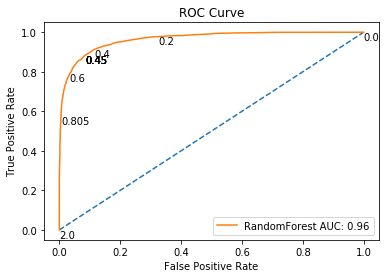

In [9]:
plot_roc(y_test1, probs, 'RandomForest')

In [22]:
matrix_info(0.455,y_test1, probs)

f1_score:
0.849855245405214
precision_score:
0.8487540683517956
accuracy_score:
0.852425
Confusion Matrix:
[[19665  3223]
 [ 2680 14432]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     22888
           1       0.82      0.84      0.83     17112

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000



(0.849855245405214, 0.8487540683517956, 0.852425, 0.9304391912856051)

In [10]:
start = time.time()
mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.001, hidden_layer_sizes = (32, 32), max_iter = 10000)
mlp.fit(x_train1, y_train1)

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
probs_nn = mlp.predict_proba(x_test1)[:,1]

Elapsed Time: 17 seconds


max(tpr - fpr) w/ th =  0.4461228714959328


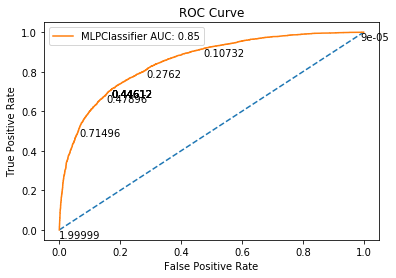

f1_score:
0.7724523399472379
precision_score:
0.7752285593730208
accuracy_score:
0.7787
Confusion Matrix:
[[4722  984]
 [1229 3065]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5706
           1       0.76      0.71      0.73      4294

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000



(0.7724523399472379, 0.7752285593730208, 0.7787, 0.8533112008686465)

In [11]:
plot_roc(y_test1, probs_nn, 'MLPClassifier')

matrix_info(0.53, y_test1, probs_nn)

In [10]:
svc = LSVC(C = 3, loss = 'hinge', max_iter=10000)
svc = CalibratedClassifierCV(svc)
svc.fit(x_train1,y_train1)
probs = svc.predict_proba(x_test1)[:,1]

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


max(tpr - fpr) w/ th =  0.4392937121505492


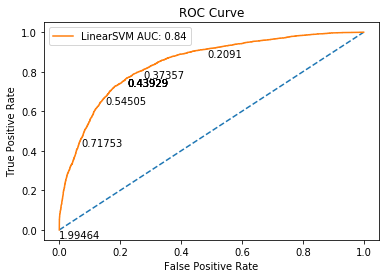

In [11]:
plot_roc(y_test1, probs, 'LinearSVM')

In [32]:
parameters = {'solver': ['adam','lbfgs'], 
              'activation': ['relu'],
              'max_iter': [10000], 
              'alpha': 10.0 ** -np.arange(1, 5), 
              'hidden_layer_sizes':[(10,1),(16,16),(10,10),(64,1),(64,64),(32,32),(32,16)]}
cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv = 5, verbose = 20)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1336s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.5927s.) Setting batch_size=1.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:  1.1min
[Paralle

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]),
                         'h

In [33]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32), 'max_iter': 10000, 'solver': 'adam'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,7.990436,1.569940,0.015160,0.010392,relu,0.001,"(32, 32)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.769479,0.772617,0.752323,0.750707,0.763232,0.761674,0.008841,1
46,7.058115,2.703894,0.005784,0.000399,relu,0.0001,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.751716,0.760097,0.754747,0.747879,0.785051,0.759897,0.013194,2
4,4.674869,1.525631,0.008380,0.003867,relu,0.1,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.714574,0.758481,0.753939,0.769293,0.763232,0.751899,0.019351,3
40,7.320126,1.681171,0.007979,0.001410,relu,0.001,"(32, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.731530,0.750000,0.744242,0.728889,0.785859,0.748101,0.020433,4
50,8.913055,2.750792,0.013364,0.001492,relu,0.0001,"(64, 64)",10000,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.735567,0.765751,0.705455,0.754747,0.766061,0.745516,0.022892,5
24,6.506609,1.948132,0.011171,0.003051,relu,0.01,"(32, 32)",10000,adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.713363,0.760501,0.709899,0.766061,0.757576,0.741477,0.024548,6
8,9.704839,2.271285,0.016954,0.003154,relu,0.1,"(64, 64)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.746871,0.682553,0.749899,0.771313,0.720404,0.734206,0.030471,7
18,6.900554,3.510965,0.006383,0.001018,relu,0.01,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.766653,0.598950,0.749899,0.763636,0.764444,0.728712,0.065155,8
2,4.403415,1.289711,0.005984,0.000630,relu,0.1,"(16, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.768268,0.723748,0.616162,0.771717,0.757576,0.727500,0.058188,9
30,5.644494,2.149511,0.006384,0.001492,relu,0.001,"(16, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.716996,0.721325,0.715960,0.756768,0.701010,0.722411,0.018494,10


In [69]:
params = {
    'n_estimators': [200],
    'max_depth' : [1,10,25,50,75,100]
}

clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state=42)
cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [70]:
cv_rf = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_rf.sort_values('rank_test_score').reset_index()['params'][0])
cv_rf.sort_values('rank_test_score')

best params:  {'max_depth': 75, 'n_estimators': 200}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,10.444399,0.431850,3.123003,0.597215,75,200,"{'max_depth': 75, 'n_estimators': 200}",0.904410,0.9064,0.9056,0.9048,0.900490,0.90434,0.002043,1
5,9.823797,1.265460,0.999000,1.035584,100,200,"{'max_depth': 100, 'n_estimators': 200}",0.904410,0.9064,0.9056,0.9048,0.900490,0.90434,0.002043,1
3,11.103399,0.261796,3.297001,0.307195,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.903810,0.9059,0.9057,0.9051,0.900490,0.90420,0.001993,3
2,10.634397,0.359733,2.959002,0.239607,25,200,"{'max_depth': 25, 'n_estimators': 200}",0.897310,0.8982,0.8992,0.8983,0.891689,0.89694,0.002693,4
1,7.322509,0.806921,3.067602,0.296348,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.806619,0.8058,0.8055,0.8014,0.802380,0.80434,0.002057,5
0,1.808720,0.625019,2.465400,0.233617,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.602440,0.5867,0.5932,0.6036,0.599860,0.59716,0.006352,6


In [17]:
cv_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.117403,1.013367,1.698999,0.255120,None,200,"{'max_depth': None, 'n_estimators': 200}",0.904410,0.9064,0.9056,0.9048,0.90049,0.90434,0.002043,1
1,4.474804,1.736694,2.841802,0.437798,1,200,"{'max_depth': 1, 'n_estimators': 200}",0.602440,0.5867,0.5932,0.6036,0.59986,0.59716,0.006352,5
2,6.628413,0.846129,2.988997,0.237431,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.806619,0.8058,0.8055,0.8014,0.80238,0.80434,0.002057,4
3,10.069333,0.438946,3.249159,0.182484,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.903810,0.9059,0.9057,0.9051,0.90049,0.90420,0.001993,3
4,9.801171,1.141707,1.208400,0.992366,100,200,"{'max_depth': 100, 'n_estimators': 200}",0.904410,0.9064,0.9056,0.9048,0.90049,0.90434,0.002043,1


In [18]:
import seaborn as sns

In [58]:
cv.cv_results_['mean_test_score']

array([0.90434, 0.59716, 0.80434, 0.9042 , 0.90434])

(6, 1)


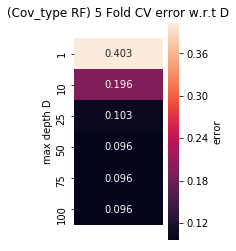

In [74]:
D_list = [1,10,25,50,75,100]

# Draw heatmaps for result of grid search.
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

cross_val_errors = 1 - cv.cv_results_['mean_test_score'].reshape((-1, 1))
print(cross_val_errors.shape)
draw_heatmap(cross_val_errors, D_list, title='(Cov_type RF) 5 Fold CV error w.r.t D')

In [69]:
params = {
    'C': [1,3,5,10],
    'loss':['hinge'],
    'max_iter': [10000,20000]
}

svc = LSVC(max_iter=10000)
cv = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 3, 5, 10], 'loss': ['hinge'],
                         'max_iter': [10000, 20000]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring='accuracy', verbose=20)

In [70]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 3, 'loss': 'hinge', 'max_iter': 10000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.475669,0.261214,0.000997,6.299989e-04,3,hinge,10000,"{'C': 3, 'loss': 'hinge', 'max_iter': 10000}",0.793207,0.783,0.773,0.770,0.789790,0.7818,0.009079,1
0,0.969010,0.078606,0.000997,3.234067e-07,1,hinge,10000,"{'C': 1, 'loss': 'hinge', 'max_iter': 10000}",0.793207,0.783,0.773,0.770,0.788789,0.7816,0.008910,2
3,2.875406,0.591390,0.000998,1.340243e-06,3,hinge,20000,"{'C': 3, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.787788,0.7814,0.008757,3
1,1.007708,0.088960,0.000799,3.994022e-04,1,hinge,20000,"{'C': 1, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.786787,0.7812,0.008619,4
5,5.028292,0.420864,0.001795,1.163857e-03,5,hinge,20000,"{'C': 5, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.786787,0.7812,0.008619,4
7,7.504991,1.917206,0.001000,1.265192e-06,10,hinge,20000,"{'C': 10, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.785,0.772,0.769,0.786787,0.7812,0.009202,4
4,5.332012,0.568569,0.001196,3.991615e-04,5,hinge,10000,"{'C': 5, 'loss': 'hinge', 'max_iter': 10000}",0.791209,0.783,0.773,0.769,0.787788,0.7808,0.008511,7
6,9.771397,0.950261,0.001796,3.997331e-04,10,hinge,10000,"{'C': 10, 'loss': 'hinge', 'max_iter': 10000}",0.792208,0.780,0.773,0.771,0.787788,0.7808,0.008204,7


In [39]:
params = {
    'C': [1, 5], 
    'kernel': ['linear', 'rbf'], 
    'degree': [3, 7, 10],
    'gamma': np.power(5, np.linspace(-2,5, 5)),
    'max_iter': [100000]
}

svc = SVC()
cv = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Paralle

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5], 'degree': [3, 7, 10],
                         'gamma': array([4.00000000e-02, 6.68740305e-01, 1.11803399e+01, 1.86918598e+02,
       3.12500000e+03]),
                         'kernel': ['linear', 'rbf'], 'max_iter': [100000]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring='accuracy', verbose=20)

In [34]:
x_train1

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
304001,2867,12,13,212,2,1924,206,212,142,1812,...,1,0,0,0,0,0,0,0,0,0
333606,3097,295,15,175,49,1505,178,235,197,1191,...,0,0,0,0,0,0,0,0,0,0
260019,3039,162,4,134,16,3059,223,240,152,1292,...,0,1,0,0,0,0,0,0,0,0
72966,3041,29,12,376,66,5389,216,213,131,3750,...,0,0,0,0,0,0,0,0,0,0
351036,3210,59,6,0,0,1902,224,228,139,1812,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238314,3068,208,5,90,-12,2190,217,244,164,3705,...,0,0,0,0,0,0,0,0,0,0
336087,2932,222,12,663,96,2627,205,251,181,1716,...,0,0,0,0,0,0,0,0,0,0
461295,3250,308,3,67,11,693,212,237,164,1262,...,0,0,0,0,0,0,0,0,1,0
269104,3175,108,19,277,68,752,249,214,86,666,...,0,0,1,0,0,0,0,0,0,0


In [40]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 5, 'degree': 10, 'gamma': 0.04, 'kernel': 'rbf', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,2.353872,0.139754,0.384772,0.029790,5,10,0.04,rbf,100000,"{'C': 5, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
31,2.568265,0.166693,0.366639,0.020163,5,3,0.04,rbf,100000,"{'C': 5, 'degree': 3, 'gamma': 0.04, 'kernel':...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
41,2.853188,0.191577,0.471340,0.056109,5,7,0.04,rbf,100000,"{'C': 5, 'degree': 7, 'gamma': 0.04, 'kernel':...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
3,4.380591,0.248239,0.649270,0.065163,1,3,0.66874,rbf,100000,"{'C': 1, 'degree': 3, 'gamma': 0.6687403049764...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
23,4.110350,0.194912,0.670208,0.050363,1,10,0.66874,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.668740304976...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
13,4.134265,0.188002,0.668224,0.025363,1,7,0.66874,rbf,100000,"{'C': 1, 'degree': 7, 'gamma': 0.6687403049764...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
1,2.285059,0.356587,0.320534,0.085731,1,3,0.04,rbf,100000,"{'C': 1, 'degree': 3, 'gamma': 0.04, 'kernel':...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
21,2.551552,0.226214,0.402159,0.017890,1,10,0.04,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
11,2.557165,0.271641,0.416488,0.028675,1,7,0.04,rbf,100000,"{'C': 1, 'degree': 7, 'gamma': 0.04, 'kernel':...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
33,4.357085,0.254296,0.558053,0.018864,5,3,0.66874,rbf,100000,"{'C': 5, 'degree': 3, 'gamma': 0.6687403049764...",0.808192,0.777223,0.787,0.781782,0.800801,0.7910,0.011685,10


In [32]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 1, 'degree': 10, 'gamma': 3125.0, 'kernel': 'rbf', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,5.798716,0.341561,1.273867,0.061789,1,10,3125,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 3125.0, 'kerne...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
31,5.870519,0.380944,1.263730,0.064457,1,10,0.04,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
33,5.848913,0.398054,1.273519,0.080736,1,10,0.66874,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.668740304976...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
35,6.105049,0.352619,1.273745,0.073564,1,10,11.1803,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 11.18033988749...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
37,6.032891,0.352681,1.293661,0.073773,1,10,186.919,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 186.9185976526...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,8.256499,0.474628,0.109705,0.012694,1,3,186.919,linear,100000,"{'C': 1, 'degree': 3, 'gamma': 186.91859765265...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
18,10.086388,0.197747,0.170566,0.034574,1,3,3125,linear,100000,"{'C': 1, 'degree': 3, 'gamma': 3125.0, 'kernel...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
36,7.598050,0.267677,0.102326,0.008662,1,10,186.919,linear,100000,"{'C': 1, 'degree': 10, 'gamma': 186.9185976526...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
8,8.198848,0.379884,0.102765,0.009486,1,2,3125,linear,100000,"{'C': 1, 'degree': 2, 'gamma': 3125.0, 'kernel...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61


In [20]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 5, 'degree': 10, 'gamma': 3125.0, 'kernel': 'linear', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
159,5.987801,0.221501,0.068331,0.009900,5,10,3125,linear,100000,"{'C': 5, 'degree': 10, 'gamma': 3125.0, 'kerne...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
136,7.997192,0.408793,0.106914,0.023461,5,3,73.1004,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 73.100443455321...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
135,8.001259,0.302747,0.099534,0.008952,5,3,20.9063,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 20.906275773759...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
134,8.874059,0.521921,0.101927,0.006688,5,3,5.97907,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 5.9790658725020...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
133,9.529589,0.282009,0.118613,0.011472,5,3,1.70998,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 1.7099759466766...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,8.095172,0.437890,0.121276,0.014693,0.1,7,5.97907,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 5.97906587250...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
23,8.226855,0.397989,0.130860,0.012974,0.1,7,1.70998,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 1.70997594667...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
22,9.454508,0.903808,0.123868,0.012350,0.1,7,0.489043,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 0.48904256961...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
20,8.144085,0.610632,0.123669,0.007490,0.1,7,0.04,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 0.04, 'kernel...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121


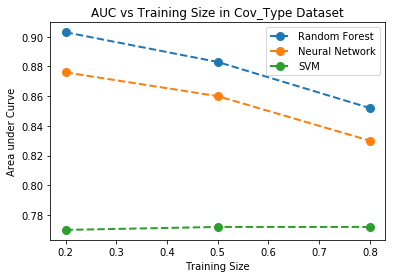

In [76]:
rf_cov = np.array([(0.2, 0.903), (0.5, 0.883), (0.8, 0.852)])
nn_cov = np.array([(0.2, 0.876), (0.5, 0.860), (0.8, 0.830)])
svm_cov = np.array([(0.2, 0.770), (0.5, 0.772), (0.8, 0.772)])

x1 = rf_cov[:,0]
y1 = rf_cov[:,1]

x2 = nn_cov[:,0]
y2 = nn_cov[:,1]

x3 = svm_cov[:,0]
y3 = svm_cov[:,1]

plt.plot(x1, y1, marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Random Forest')
plt.plot(x2, y2, marker='o', linestyle='dashed', linewidth=2, markersize=8, label = 'Neural Network')
plt.plot(x3, y3, marker='o', linestyle='dashed', linewidth=2, markersize=8, label = 'SVM')
plt.xlabel('Training Size')
plt.ylabel('Area under Curve')
plt.title('AUC vs Training Size in Cov_Type Dataset')
plt.legend()
plt.show()